# Load Dependencies

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from rdkit.DataStructs.cDataStructs import ExplicitBitVect
from rdkit.Chem import rdMolDescriptors
from rdkit.Avalon import pyAvalonTools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
RandomForest_opt =  RandomForestRegressor()

In [2]:
class FingerprintGenerator():

    def __init__(self):
        print("FingerprintGenerator geladen")

    def generateArrofFingerprints(self, data, lengthPerFP):
        if data == 'nan':
            return self.__generateFingerprints_ALL('NA',lengthPerFP)
        return self.__generateFingerprints_ALL(data,lengthPerFP)

    def __generateFingerprints_ALL(self, data, lengthPerFP):
             
        length = lengthPerFP
        fp_dict = {}
        ret_arr = []

        fp_dict['0'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 2, length))
        fp_dict['1'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 4, length))
        fp_dict['2'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 6, length))
        fp_dict['3'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 8, length))

        fp_dict['4'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 2, length))
        fp_dict['5'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 4, length))
        fp_dict['6'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 6, length))
        fp_dict['7'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 8, length))

        fp_dict['8'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 0, length))
        fp_dict['9'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 2, length))
        fp_dict['10'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 4, length))
        fp_dict['11'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 6, length))

        fp_dict['12'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 0, length))
        fp_dict['13'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 2, length))
        fp_dict['14'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 4, length))
        fp_dict['15'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 6, length))

        fp_dict['16'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 2, length))
        fp_dict['17'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 4, length))
        fp_dict['18'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 6, length))
        fp_dict['19'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 8, length))
        
        fp_dict['20'] = self.__generate_boolArray(self.__generateFingerprints_Avalon(data, length))       
        fp_dict['21'] = self.__generate_boolArray(self.__generateFingerprints_Atom_Pairs(data, length))
        fp_dict['22'] = self.__generate_boolArray(self.__generateFingerprints_Topological_Torsions(data, length))
        fp_dict['23'] = self.__generate_boolArray(self.__generateFingerprints_MACCS_keys(data))
        #for item in fp_dict:
        #    ret_arr.extend(fp_dict[item])

        return fp_dict

    def __generate_boolArray(self, fp: ExplicitBitVect) -> []:
        string = fp.ToBitString()
        boolarr = []
        for c in string:
            if c == '1':
                boolarr.append(1) #True
            else:
                boolarr.append(-1) #False

        return boolarr

    def __getEmptyBitVector(self, length):
        bitvector = ExplicitBitVect(length)
        return bitvector

    def __generateFingerprints_RDKit(self, data, maxPath, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        fp = Chem.RDKFingerprint(mol=data, maxPath=maxPath, fpSize=length)
        return fp

    def __generateFingerprints_RDKitlinear(self, data, maxPath, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        fp = Chem.RDKFingerprint(mol=data, maxPath=maxPath, branchedPaths=False, fpSize=length)
        return fp

    def __generateFingerprints_Atom_Pairs(self, data, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(data, nBits=length)

    def __generateFingerprints_Topological_Torsions(self, data, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(data, nBits=length)

    def __generateFingerprints_MACCS_keys(self, data):
        if data == 'NA':
            return self.__getEmptyBitVector(167)
        return MACCSkeys.GenMACCSKeys(data)

    def __generateFingerprints_Morgan_Circular(self, data, r, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return AllChem.GetMorganFingerprintAsBitVect(data, r, nBits=length)

    def __generateFingerprints_Morgan_Circular_Feature(self, data, r, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return AllChem.GetMorganFingerprintAsBitVect(data, r, useFeatures=True, nBits=length)

    def __generateFingerprints_Avalon(self, data, bitlength):
        if data == 'NA':
            return self.__getEmptyBitVector(bitlength)
        return pyAvalonTools.GetAvalonFP(data, nBits=bitlength)

    def __generateFingerprints_LayerdFingerprint(self, data, r, bitlength):
        if data == 'NA':
            return self.__getEmptyBitVector(bitlength)
        return Chem.LayeredFingerprint(data, maxPath=r, fpSize=bitlength)

# Generate Descriptor

In [3]:
fin_size=2560
def get_all_dict(smi_set):
    all_fin=[]
    all_dict={}
    fin=FingerprintGenerator()
    for tmp_smi in smi_set:
        tmp_mol = AllChem.AddHs(Chem.MolFromSmiles(tmp_smi))
        AllChem.EmbedMolecule(tmp_mol)
        AllChem.MMFFOptimizeMolecule(tmp_mol)
        fp_dict=fin.generateArrofFingerprints(tmp_mol, lengthPerFP=fin_size)
        all_dict[tmp_smi] = fp_dict
        all_fin.append(fp_dict)
    all_fin=np.array(all_fin)
    return all_fin,all_dict

In [24]:
data_file = './Data/data2/data2.csv'
tmp_df = pd.read_csv(data_file)
cat_smiles = np.array(tmp_df['Catalyst'].to_list())
imine_smiles =  np.array(tmp_df['Imine'].to_list())
thiol_smiles =  np.array(tmp_df['Thiol'].to_list())
labels = np.array(tmp_df['Output'].to_list())
labels_std = (labels - labels.min())/(labels.max()-labels.min())
cat_smi_set = list(set(cat_smiles))
imine_smi_set = list(set(imine_smiles))
thiol_smi_set = list(set(thiol_smiles))
cat_smi_set.sort()
imine_smi_set.sort()
thiol_smi_set.sort()

In [25]:
cat_all,cat_all_dict=get_all_dict(cat_smi_set)
imine_all,imine_all_dict=get_all_dict(imine_smi_set)
thiol_all,thiol_all_dict=get_all_dict(thiol_smi_set)

FingerprintGenerator geladen


[13:37:11] UFFTYPER: Unrecognized atom type: S_6+6 (10)
[13:37:11] UFFTYPER: Unrecognized atom type: S_6+6 (34)


FingerprintGenerator geladen
FingerprintGenerator geladen


# Descriptor Selection

In [26]:
np.random.seed(1000)
shuffle = np.array(list(range(1075)))
np.random.shuffle(shuffle)
train_index = shuffle[:600]
val_index = shuffle[600:]

In [87]:
for i in range(24):
    total_cat = np.array([[cat_all_dict[tmp_smi][str(i)]] for tmp_smi in cat_smiles]).reshape(1075,-1)
    total_imine = np.array([[imine_all_dict[tmp_smi][str(i)]] for tmp_smi in imine_smiles]).reshape(1075,-1)
    total_thiol = np.array([[thiol_all_dict[tmp_smi][str(i)]] for tmp_smi in thiol_smiles]).reshape(1075,-1)
    react_feat = des_std(np.concatenate([total_cat,total_imine,total_thiol],axis=1))
    model= RandomForest_opt     
    all_r2 = []
    all_pearsr = []
    all_mae = []
    all_rmse= []
    repeat_pred = []
    repeat_test = []
    for j in range(1):           
        train_x,test_x = react_feat[train_index],react_feat[val_index]
        train_y,test_y = labels[train_index],labels[val_index]
        model.fit(train_x,train_y)
        test_pred = model.predict(test_x)
        test_y=test_y
        repeat_pred.append(test_pred)
        repeat_test.append(test_y)
        r2 = r2_score(test_y,test_pred)
        pearsr = pearsonr(test_y,test_pred)
        mae = mean_absolute_error(test_y,test_pred)
        rmse=(mean_squared_error(test_y,test_pred))**(0.5)
        all_r2.append(r2)
        all_pearsr.append(pearsr[0])
        all_mae.append(mae)
        all_rmse.append(rmse)   
    print(i,all_r2)

0 [0.6004007624639598]
1 [0.8584175418915243]
2 [0.8907684517083978]
3 [0.8972157626881783]
4 [0.604144172008954]
5 [0.8053012964748605]
6 [0.8687756121406472]
7 [0.8938559047705739]
8 [0.6382672551916706]
9 [0.8952943335928213]
10 [0.8954121194696515]
11 [0.8980323261078604]
12 [0.2109445613661599]
13 [0.8827849471307484]
14 [0.8879865432705571]
15 [0.8861522163366863]
16 [0.3841010117175915]
17 [0.8025977800157607]
18 [0.7873229753169481]
19 [0.7970582711323846]
20 [0.8891472560655388]
21 [0.8880809795303414]
22 [0.7238252790824515]
23 [0.5622581666516999]


In [27]:
total_cat = np.array([[cat_all_dict[tmp_smi][str(11)]] for tmp_smi in cat_smiles]).reshape(1075,-1)
total_imine = np.array([[imine_all_dict[tmp_smi][str(11)]] for tmp_smi in imine_smiles]).reshape(1075,-1)
total_thiol = np.array([[thiol_all_dict[tmp_smi][str(11)]] for tmp_smi in thiol_smiles]).reshape(1075,-1)
react_feat = des_std(np.concatenate([total_cat,total_imine,total_thiol],axis=1))

# Training Models

## Random Splitting

In [138]:
np.random.seed(1000)
shuffle = np.array(list(range(1075)))
np.random.shuffle(shuffle)
train_index = shuffle[:600]
val_index = shuffle[600:]

In [139]:
model= RandomForest_opt   
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index] 
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

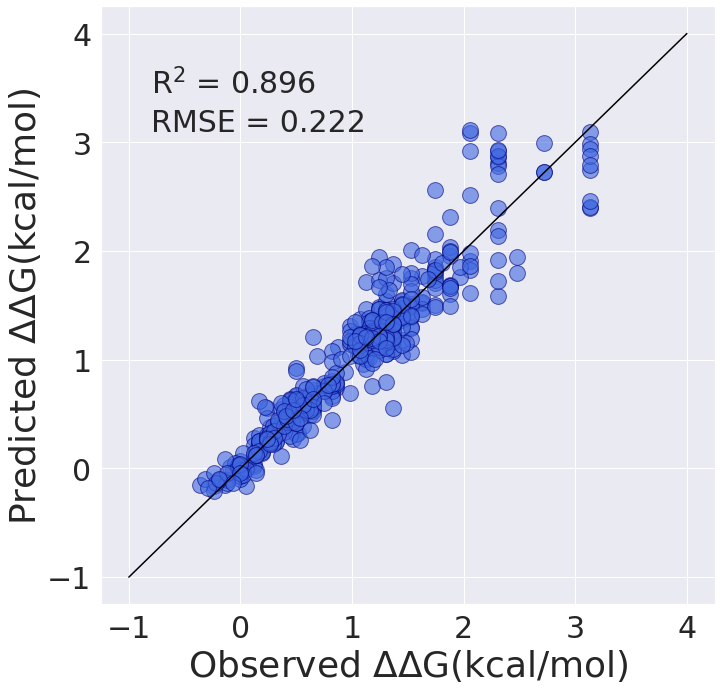

In [91]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## Thiol Splitting

In [42]:
train_thiol = [ 'SC1=CC=CC=C1C', 'SC1=CC=C(OC)C=C1','SC1=CC=CC=C1']
test_thiol = ['SC1CCCCC1','CCS']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(thiol_smiles):
    if tmp_smi in train_thiol:
        train_index.append(tmp_idx)
    elif tmp_smi in test_thiol:
        val_index.append(tmp_idx)

In [43]:
model= RandomForest_opt
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index] 
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

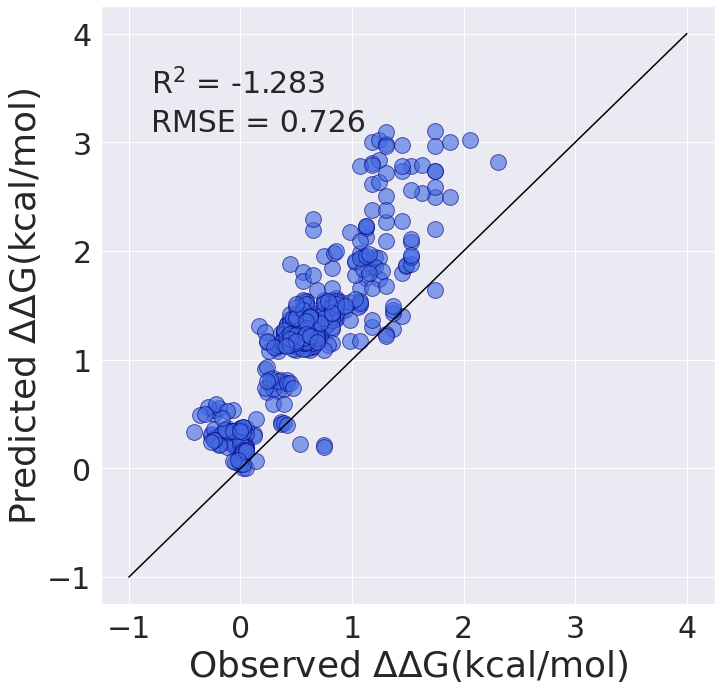

In [198]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## Imine Splitting

In [45]:
train_imine = [ 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2', 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl',
               'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2', 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2']
test_imine = [ 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(imine_smiles):
    if tmp_smi in train_imine:
        train_index.append(tmp_idx)
    elif tmp_smi in test_imine:
        val_index.append(tmp_idx)

In [46]:
model= RandomForest_opt    
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index] 
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

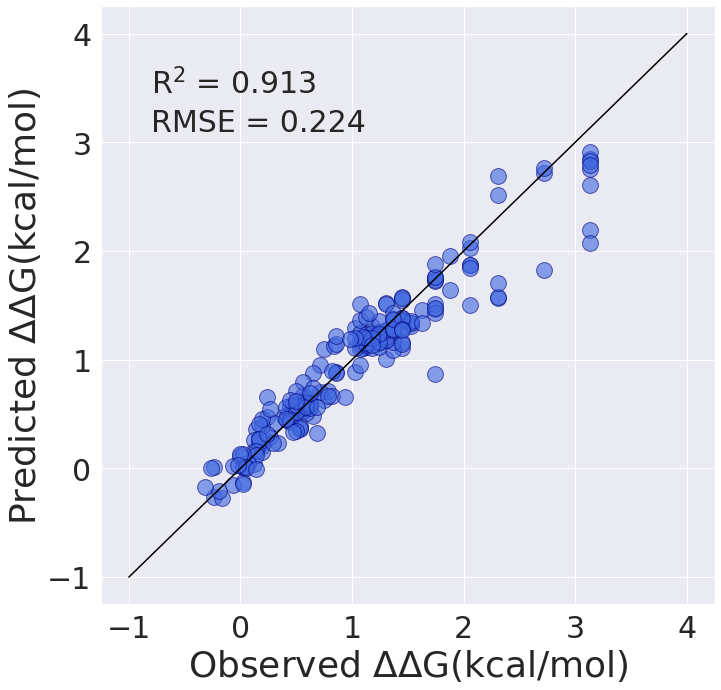

In [201]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## Catalyst Splitting

In [48]:
cat_id_map_dict={1:'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                 2:'O=P1(O)OC2=C(C3=CC(C4=CC=C(OC)C=C4)=CC(C5=CC=C(OC)C=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC=C(OC)C=C9)=CC(C%10=CC=C(OC)C=C%10)=C8)=CC%11=C7C=CC=C%11',
                 3:'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5C=CC=C7', 
                 4:'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5C=CC=C7', 
                 5:'O=P1(O)OC2=C(Br)C=C3C(CCCC3)=C2C4=C(O1)C(Br)=CC5=C4CCCC5', 
                 6:'O=P1(O)OC2=C(C3=CC=C(C4CCCCC4)C=C3)C=C5C(CCCC5)=C2C6=C(O1)C(C7=CC=C(C8CCCCC8)C=C7)=CC9=C6CCCC9', 
                 7:'O=P1(O)OC2=C(CC3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C(CC8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                 8:'O=P1(O)OC2=C(C3=CC(C)=C(OC(C)C)C(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=C(OC(C)C)C(C)=C6)=CC7=C5C=CC=C7',
                 9:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C)C4=CC=CC=C4)C=C5C(C=CC=C5)=C2C6=C(O1)C([Si](C7=CC=CC=C7)(C8=CC=CC=C8)C)=CC9=C6C=CC=C9', 
                 10:'O=P1(O)OC2=C(CC3=CC=C(OC)C=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC=C(OC)C=C6)=CC7=C5CCCC7',
                 11:'O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C(CCCC4)=[C@]2[C@]5=C(O1)C(C6=C(Cl)C=C(Cl)C=C6Cl)=CC7=C5CCCC7',
                 12:'O=P1(O)OC2=C(C3=CC(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)=CC(C5=CC(C(F)(F)F)=CC(C(F)(F)F)=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC(C(F)(F)F)=CC(C(F)(F)F)=C9)=CC(C%10=CC(C(F)(F)F)=CC(C(F)(F)F)=C%10)=C8)=CC%11=C7C=CC=C%11',
                 13:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7C=CC=C%11', 
                 14:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7CCCC%11', 
                 15:'O=P1(O)OC2=C(C3=C(F)C=C(OC)C=C3F)C=C4C(C=CC=C4)=[C@]2[C@]5=C(O1)C(C6=C(F)C=C(OC)C=C6F)=CC7=C5C=CC=C7', 
                 16:'O=P1(O)OC2=C(C3=CC(C4=CC(C=CC=C5)=C5C=C4)=CC=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=CC(C9=CC=C(C=CC=C%10)C%10=C9)=C8)=CC%11=C7C=CC=C%11', 
                 17:'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5CCCC7',
                 18:'O=P1(O)OC2=C(C3=C(C4=CC(C=CC=C5)=C5C=C4)C=CC=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC=CC=C8C9=CC=C(C=CC=C%10)C%10=C9)=CC%11=C7CCCC%11', 
                 19:'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C(C)C)C=C3C(C)C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C(C)C)C=C(C(C)C)C=C6C(C)C)=CC7=C5C=CC=C7', 
                 20:'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C4=CC=C(C(C)(C)C)C=C4)C=C3C(C)C)C=C5C(C=CC=C5)=[C@]2[C@]6=C(O1)C(C7=C(C(C)C)C=C(C8=CC=C(C(C)(C)C)C=C8)C=C7C(C)C)=CC9=C6C=CC=C9', 
                 21:'O=P1(O)OC2=C(C3=CC=C(C4=CC=C(C=CC=C5)C5=C4)C=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=C(C9=CC(C=CC=C%10)=C%10C=C9)C=C8)=CC%11=C7C=CC=C%11',
                 22:'O=P1(O)OC2=C(C3=CC=C(C(C)(C)C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C(C)(C)C)C=C6)=CC7=C5C=CC=C7', 
                 23:'O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C=C3)C=C7C(C=CC=C7)=C2C8=C(O1)C(C9=CC=C(C=C%10)C%11=C9C=CC%12=CC=CC%10=C%11%12)=CC%13=C8C=CC=C%13',
                 24:'O=P1(O)OC2=C(CC3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                 25:'O=P1(O)OC2=C(Br)C=C3C(C=CC=C3)=C2C4=C(O1)C(Br)=CC5=CC=CC=C54', 
                 26:'O=P1(O)OC2=C(CC3=CC=C(C(F)(F)F)C=C3C(F)(F)F)C=C4C(C=CC=C4)=C2C5=C(O1)C(CC6=C(C(F)(F)F)C=C(C(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                 27:'O=P1(O)OC2=C([Si](C3=CC=C(C(C)(C)C)C=C3)(C4=CC=C(C(C)(C)C)C=C4)C5=CC=C(C(C)(C)C)C=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=C(C(C)(C)C)C=C8)(C9=CC=C(C(C)(C)C)C=C9)C%10=CC=C(C(C)(C)C)C=C%10)=CC%11=C7CCCC%11', 
                 28:'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)[C@@]([C@@]8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11', 
                 29:'O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C(C)C=C(C)C=C5C)=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC(C9=C(C)C=C(C)C=C9C)=CC(C%10=C(C)C=C(C)C=C%10C)=C8)=CC%11=C7CCCC%11',
                 30:'O=P1(O)OC2=C(C3=CC=C(S(F)(F)(F)(F)F)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(S(F)(F)(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                 31:'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5CCCC7',
                 32:'O=P1(O)OC2=C(C3=CC=C(C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C)C=C6)=CC7=C5C=CC=C7',
                 33:'O=P1(O)OC2=C(C3=C(OC(F)(F)F)C=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6OC(F)(F)F)=CC7=C5C=CC=C7',
                 34:'O=P1(O)OC2=C(CC)C=C3C(CCCC3)=C2C4=C(O1)C(CC)=CC5=C4CCCC5', 
                 35:'O=P1(O)OC2=C(C3=CC=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6)=CC7=C5C=CC=C7', 
                 36:'O=P1(O)OC2=C(C3=C(OC)C=CC=C3OC)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(OC)C=CC=C6OC)=CC7=C5C=CC=C7',
                 37:'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5C=CC=C7', 
                 38:'O=P1(O)OC2=C(C3=C(C)C=C(C)C=C3C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C)C=C(C)C=C6C)=CC7=C5C=CC=C7', 
                 39:'O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6CCCCC6)C=C7C(C=CC=C7)=C2C8=C(O1)[C@@]([C@@]9=C(C%10CCCCC%10)C=C(C%11CCCCC%11)C=C9C%12CCCCC%12)=CC%13=C8C=CC=C%13',
                 40:'O=P1(O)OC2=C(C3=CC=C(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)C=C3)C=C5C(C=CC=C5)=C2C6=C(O1)C(C7=CC=C(C8=CC(C(F)(F)F)=CC(C(F)(F)F)=C8)C=C7)=CC9=C6C=CC=C9',
                 41:'O=P1(O)OC2=C(C3=C(OCC)C=CC(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=CC=C6OCC)=CC7=C5C=CC=C7', 
                 42:'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=C(C5=CC(C=CC=C6)=C6C=C5)C7=C3C=CC=C7)C=C8C(C=CC=C8)=[C@]2[C@]9=C(O1)C(C%10=C(C=CC=C%11)C%11=C(C%12=CC=C(C=CC=C%13)C%13=C%12)C%14=C%10C=CC=C%14)=CC%15=C9C=CC=C%15', 
                 43:'O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(OC)C=C6)=CC7=C5C=CC=C7'}
withh_index=[0,4,5,9,10,13,16,17,23,26,28,30,33]
withouth_index=[1,2,3,6,7,8,11,12,14,15,18,19,20,21,22,24,25,27,29,31,32,34,35,36,37,38,39,40,41,42]
train_cat=[cat_id_map_dict[tmp_idx+1] for tmp_idx in withouth_index]
test_cat=[cat_id_map_dict[tmp_idx+1] for tmp_idx in withh_index]

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(cat_smiles):
    if tmp_smi in train_cat:
        train_index.append(tmp_idx)
    elif tmp_smi in test_cat:
        val_index.append(tmp_idx)

In [49]:
model= RandomForest_opt     
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index] 
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

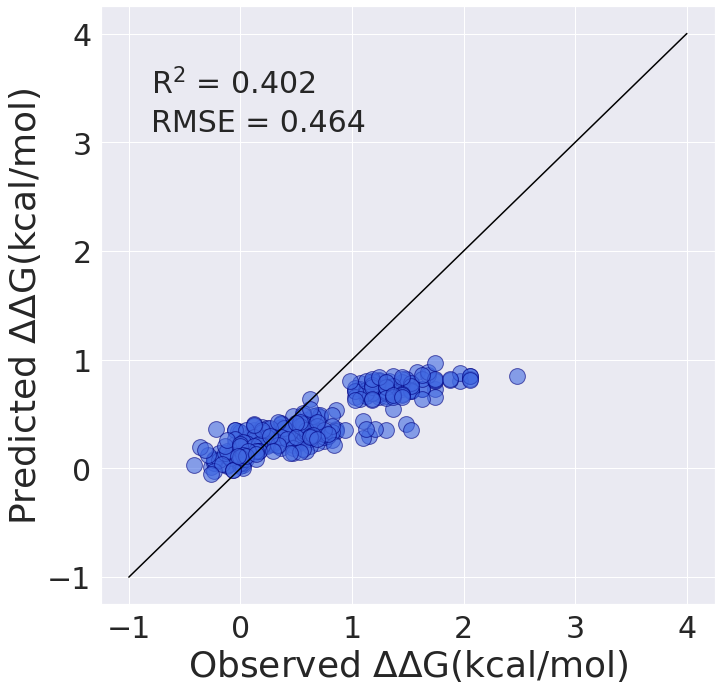

In [204]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## Transformations

In [51]:
cat_uts_train_smi = ['O=P1(O)OC2=C(Br)C=C3C(C=CC=C3)=C2C4=C(O1)C(Br)=CC5=CC=CC=C54',
                     'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C4=CC=C(C(C)(C)C)C=C4)C=C3C(C)C)C=C5C(C=CC=C5)=[C@]2[C@]6=C(O1)C(C7=C(C(C)C)C=C(C8=CC=C(C(C)(C)C)C=C8)C=C7C(C)C)=CC9=C6C=CC=C9',
                     'O=P1(O)OC2=C(C3=C(C4=CC(C=CC=C5)=C5C=C4)C=CC=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC=CC=C8C9=CC=C(C=CC=C%10)C%10=C9)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=C(C5=CC(C=CC=C6)=C6C=C5)C7=C3C=CC=C7)C=C8C(C=CC=C8)=[C@]2[C@]9=C(O1)C(C%10=C(C=CC=C%11)C%11=C(C%12=CC=C(C=CC=C%13)C%13=C%12)C%14=C%10C=CC=C%14)=CC%15=C9C=CC=C%15',
                     'O=P1(O)OC2=C(C3=C(F)C=C(OC)C=C3F)C=C4C(C=CC=C4)=[C@]2[C@]5=C(O1)C(C6=C(F)C=C(OC)C=C6F)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=C(OCC)C=CC(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=CC=C6OCC)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C(C3=CC(C)=C(OC(C)C)C(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=C(OC(C)C)C(C)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C(C)C=C(C)C=C5C)=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC(C9=C(C)C=C(C)C=C9C)=CC(C%10=C(C)C=C(C)C=C%10C)=C8)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C(C3=CC(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)=CC(C5=CC(C(F)(F)F)=CC(C(F)(F)F)=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC(C(F)(F)F)=CC(C(F)(F)F)=C9)=CC(C%10=CC(C(F)(F)F)=CC(C(F)(F)F)=C%10)=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC(C4=CC(C=CC=C5)=C5C=C4)=CC=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=CC(C9=CC=C(C=CC=C%10)C%10=C9)=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC=C(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)C=C3)C=C5C(C=CC=C5)=C2C6=C(O1)C(C7=CC=C(C8=CC(C(F)(F)F)=CC(C(F)(F)F)=C8)C=C7)=CC9=C6C=CC=C9',
                     'O=P1(O)OC2=C(C3=CC=C(C4=CC=C(C=CC=C5)C5=C4)C=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=C(C9=CC(C=CC=C%10)=C%10C=C9)C=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC=C(C4CCCCC4)C=C3)C=C5C(CCCC5)=C2C6=C(O1)C(C7=CC=C(C8CCCCC8)C=C7)=CC9=C6CCCC9',
                     'O=P1(O)OC2=C(C3=CC=C(S(F)(F)(F)(F)F)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(S(F)(F)(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(CC)C=C3C(CCCC3)=C2C4=C(O1)C(CC)=CC5=C4CCCC5',
                     'O=P1(O)OC2=C(CC3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C(CC8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(CC3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C(CC3=CC=C(OC)C=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC=C(OC)C=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C([Si](C3=CC=C(C(C)(C)C)C=C3)(C4=CC=C(C(C)(C)C)C=C4)C5=CC=C(C(C)(C)C)C=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=C(C(C)(C)C)C=C8)(C9=CC=C(C(C)(C)C)C=C9)C%10=CC=C(C(C)(C)C)C=C%10)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C(CCCC4)=[C@]2[C@]5=C(O1)C(C6=C(Cl)C=C(Cl)C=C6Cl)=CC7=C5CCCC7'
                    ]
cat_uts_test_smi = ['O=P1(O)OC2=C(Br)C=C3C(CCCC3)=C2C4=C(O1)C(Br)=CC5=C4CCCC5',
                    'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C(C)C)C=C3C(C)C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C(C)C)C=C(C(C)C)C=C6C(C)C)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=C(C)C=C(C)C=C3C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C)C=C(C)C=C6C)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6CCCCC6)C=C7C(C=CC=C7)=C2C8=C(O1)[C@@]([C@@]9=C(C%10CCCCC%10)C=C(C%11CCCCC%11)C=C9C%12CCCCC%12)=CC%13=C8C=CC=C%13',
                    'O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C=C3)C=C7C(C=CC=C7)=C2C8=C(O1)C(C9=CC=C(C=C%10)C%11=C9C=CC%12=CC=CC%10=C%11%12)=CC%13=C8C=CC=C%13',
                    'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)[C@@]([C@@]8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=C(OC)C=CC=C3OC)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(OC)C=CC=C6OC)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5CCCC7',
                    'O=P1(O)OC2=C(C3=CC(C4=CC=C(OC)C=C4)=CC(C5=CC=C(OC)C=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC=C(OC)C=C9)=CC(C%10=CC=C(OC)C=C%10)=C8)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5CCCC7',
                    'O=P1(O)OC2=C(C3=CC=C(C(C)(C)C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C(C)(C)C)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=C(C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(OC)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(CC3=CC=C(C(F)(F)F)C=C3C(F)(F)F)C=C4C(C=CC=C4)=C2C5=C(O1)C(CC6=C(C(F)(F)F)C=C(C(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C)C4=CC=CC=C4)C=C5C(C=CC=C5)=C2C6=C(O1)C([Si](C7=CC=CC=C7)(C8=CC=CC=C8)C)=CC9=C6C=CC=C9',
                    'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=C(OC(F)(F)F)C=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6OC(F)(F)F)=CC7=C5C=CC=C7'
                   ]
imine_test_smi = 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl'
thiol_test_smi = 'SC1=CC=CC=C1C'

train_idx = []
sub_test_idx = []
cat_test_idx = []
cat_sub_test_idx = []
for tmp_idx in range(len(cat_smiles)):
    tmp_cat_smi = cat_smiles[tmp_idx]
    tmp_imine_smi = imine_smiles[tmp_idx]
    tmp_thiol_smi = thiol_smiles[tmp_idx]
    if tmp_cat_smi in cat_uts_train_smi and tmp_imine_smi != imine_test_smi and tmp_thiol_smi != thiol_test_smi:
        train_idx.append(tmp_idx)
    elif (tmp_cat_smi in cat_uts_train_smi and tmp_imine_smi == imine_test_smi) or (tmp_cat_smi in cat_uts_train_smi and tmp_thiol_smi == thiol_test_smi):
        sub_test_idx.append(tmp_idx)
    elif tmp_cat_smi in cat_uts_test_smi and tmp_imine_smi != imine_test_smi and tmp_thiol_smi != thiol_test_smi:
        cat_test_idx.append(tmp_idx)
    else:
        cat_sub_test_idx.append(tmp_idx)
train_index=train_idx
val_index=sub_test_idx

In [52]:
model= RandomForest_opt      
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index] 
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

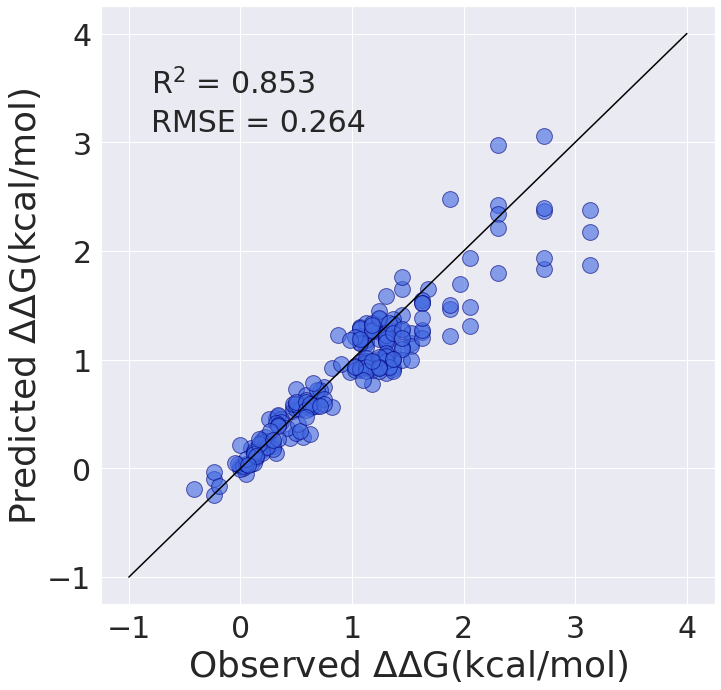

In [207]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## External Test

In [13]:
data_file = './Data/data2/data_external.xlsx'
tmp_df = pd.read_excel(data_file)
cat_smiles = np.array(tmp_df['Catalyst'].to_list())
imine_smiles =  np.array(tmp_df['Imine'].to_list())
thiol_smiles =  np.array(tmp_df['Thiol'].to_list())
labels = np.array(tmp_df['Output'].to_list())
labels_std = (labels - labels.min())/(labels.max()-labels.min())
cat_smi_set = list(set(cat_smiles))
imine_smi_set = list(set(imine_smiles))
thiol_smi_set = list(set(thiol_smiles))
cat_smi_set.sort()
imine_smi_set.sort()
thiol_smi_set.sort()

In [163]:
tmp_df

,Catalyst,Imine,Thiol,Output
0,O=P1(O)OC2=C(C3=CC=CC=C3)C=C4C(C=CC=C4)=C2C5=C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2,CCS,0.501759
1,O=P1(O)OC2=C(C3=C(F)C=C(OC)C=C3F)C=C4C(C=CC=C4...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2,CCS,1.074991
2,O=P1(O)OC2=C(C3=C(C)C=C(C)C=C3C)C=C4C(C=CC=C4)...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2,CCS,1.179891
3,O=P1(O)OC2=C(C3=CC(C)=C(OC(C)C)C(C)=C3)C=C4C(C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2,CCS,0.446374
4,O=P1(O)OC2=C(C3=CC=C(S(F)(F)(F)(F)F)C=C3)C=C4C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2,CCS,0.530235
...,...,...,...,...
1081,O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC(C(C)(C)C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2,SC1=CC=C(OC)C=C1,0.680000
1082,O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC=C(C5=CC=...,O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2,SC1=CC=C(OC)C=C1,0.670000
1083,O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC=C(C(F)(F...,O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2,SC1=CC=C(OC)C=C1,0.650000
1084,O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC=C(Cl)C=C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2,SC1=CC=C(OC)C=C1,0.520000


In [14]:
cat_all,cat_all_dict=get_all_dict(cat_smi_set)
imine_all,imine_all_dict=get_all_dict(imine_smi_set)
thiol_all,thiol_all_dict=get_all_dict(thiol_smi_set)

FingerprintGenerator geladen


[22:13:34] UFFTYPER: Unrecognized atom type: S_6+6 (10)
[22:13:34] UFFTYPER: Unrecognized atom type: S_6+6 (34)


FingerprintGenerator geladen
FingerprintGenerator geladen


In [15]:
total_cat = np.array([[cat_all_dict[tmp_smi][str(11)]] for tmp_smi in cat_smiles]).reshape(1075+11,-1)
total_imine = np.array([[imine_all_dict[tmp_smi][str(11)]] for tmp_smi in imine_smiles]).reshape(1075+11,-1)
total_thiol = np.array([[thiol_all_dict[tmp_smi][str(11)]] for tmp_smi in thiol_smiles]).reshape(1075+11,-1)
react_feat = des_std(np.concatenate([total_cat,total_imine,total_thiol],axis=1))

In [16]:
train_index = list(range(1075))
val_index =list(range(1075,1075+11))

In [17]:
labels_adj=labels*0.693
model= RandomForest_opt     
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels_adj[train_index],labels[val_index] 
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

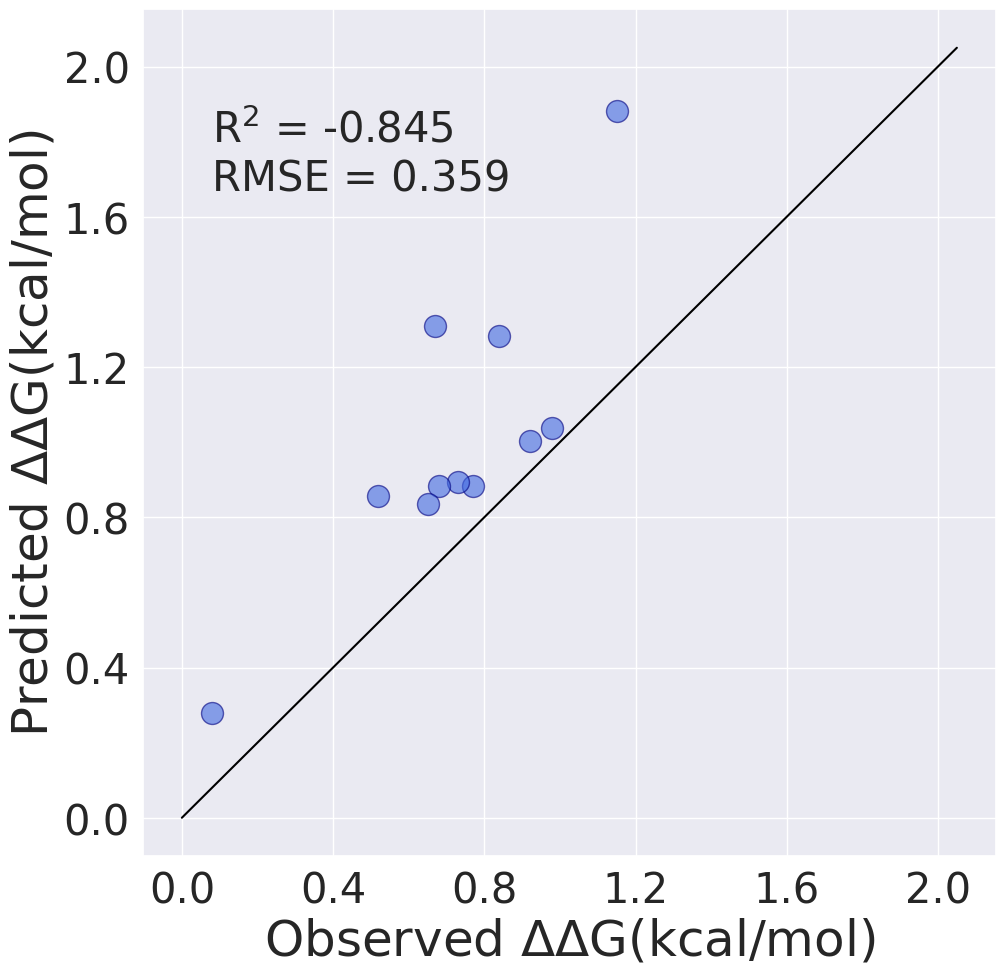

In [23]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([0,2.05],[0,2.05],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.xticks(np.arange(0, 2.05, step=0.4))
plt.yticks(np.arange(0, 2.05, step=0.4))
plt.text(0.08,1.67,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(0.08,1.8,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()